# Model Report

In [1]:
import warnings
from pathlib import Path
from time import time

import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotnine as gg
import pymc3 as pm
import seaborn as sns

from src.command_line_interfaces import sampling_pymc3_models_cli as sampling
from src.data_processing import common as dphelp
from src.modeling import pymc3_analysis as pmanal
from src.modeling import pymc3_sampling_api as pmapi
from src.models.speclet_pipeline_test_model import SpecletTestModel
from src.plot.color_pal import SeabornColor

notebook_tic = time()

warnings.simplefilter(action="ignore", category=UserWarning)

gg.theme_set(gg.theme_classic())
%config InlineBackend.figure_format = "retina"

RANDOM_SEED = 847
np.random.seed(RANDOM_SEED)

Parameters for papermill:

- `MODEL`: which model was tested
- `MODEL_NAME`: name of the model
- `DEBUG`: if in debug mode or not
- `FIT_METHOD`: method used to fit the model; either "ADVI" or "MCMC"

## Setup

### Papermill parameters

In [2]:
MODEL = ""
MODEL_NAME = ""
DEBUG = True
FIT_METHOD = ""

In [3]:
# Parameters
MODEL = "speclet-seven"
MODEL_NAME = "SpecletSeven-debug-noncentered"
DEBUG = True
FIT_METHOD = "ADVI"

In [4]:
assert FIT_METHOD in ["ADVI", "MCMC"]

In [5]:
speclet_model = sampling.sample_speclet_model(
    MODEL,
    name=MODEL_NAME,
    fit_method=FIT_METHOD,
    debug=DEBUG,
    random_seed=RANDOM_SEED,
    touch=False,
)

[06/16/21 11:17:45] INFO     Cache directory: /n/data1/hms/db ]8;id=1623856665.3373806-49057;file:///n/data1/hms/dbmi/park/Cook/speclet/src/command_line_interfaces/sampling_pymc3_models_cli.py\sampling_pymc3_models_cli.py]8;;\:87
                             mi/park/Cook/speclet/models

                    INFO     Sampling in debug mode.          ]8;id=1623856665.3432844-415526;file:///n/data1/hms/dbmi/park/Cook/speclet/src/command_line_interfaces/sampling_pymc3_models_cli.py\sampling_pymc3_models_cli.py]8;;\:92

                    INFO     Sampling 'speclet-seven' with    ]8;id=1623856665.3466203-984805;file:///n/data1/hms/dbmi/park/Cook/speclet/src/command_line_interfaces/sampling_pymc3_models_cli.py\sampling_pymc3_models_cli.py]8;;\:94
                             custom name                                                     
                             'SpecletSeven-debug-noncentered'

                    INFO     Modifying SpecletSeven model based on the     ]8;id=1623856665.3606162-114758;file:///n/data1/hms/dbmi/park/Cook/speclet/src/command_line_interfaces/cli_helpers.py\cli_helpers.py]8;;\:190
                             name: 'SpecletSeven-debug-noncentered'.

                    INFO     Changing `noncentered_param` to              ]8;id=1623856665.3640873-284172;file:///n/data1/hms/dbmi/park/Cook/speclet/src/models/speclet_seven.py\speclet_seven.py]8;;\:98
                             `{new_value}`.

                    WARNING  Reseting all model and results.             ]8;id=1623856665.3672931-362823;file:///n/data1/hms/dbmi/park/Cook/speclet/src/models/speclet_model.py\speclet_model.py]8;;\:144

                    INFO     Running model build method.     ]8;id=1623856665.3704424-298197;file:///n/data1/hms/dbmi/park/Cook/speclet/src/command_line_interfaces/sampling_pymc3_models_cli.py\sampling_pymc3_models_cli.py]8;;\:102

                    INFO     Calling `model_specification()` method.     ]8;id=1623856665.3736653-217191;file:///n/data1/hms/dbmi/park/Cook/speclet/src/models/speclet_model.py\speclet_model.py]8;;\:184

                    INFO     Beginning PyMC3 model specification.        ]8;id=1623856665.3768053-26663;file:///n/data1/hms/dbmi/park/Cook/speclet/src/models/speclet_seven.py\speclet_seven.py]8;;\:180

                    INFO     Applying 2 data transformations.      ]8;id=1623856665.416711-765733;file:///n/data1/hms/dbmi/park/Cook/speclet/src/managers/model_data_managers.py\model_data_managers.py]8;;\:129

                    INFO     Applying transformation: '_drop_sgrna ]8;id=1623856665.4207795-985509;file:///n/data1/hms/dbmi/park/Cook/speclet/src/managers/model_data_managers.py\model_data_managers.py]8;;\:116
                             s_that_map_to_multiple_genes'

                    WARNING  Dropping 0 sgRNA that map to multiple ]8;id=1623856665.4372907-67353;file:///n/data1/hms/dbmi/park/Cook/speclet/src/managers/model_data_managers.py\model_data_managers.py]8;;\:249
                             genes.

                    INFO     Applying transformation:              ]8;id=1623856665.443486-901929;file:///n/data1/hms/dbmi/park/Cook/speclet/src/managers/model_data_managers.py\model_data_managers.py]8;;\:116
                             '_drop_missing_copynumber'

                    WARNING  Dropping 0 data points with missing   ]8;id=1623856665.4488761-995036;file:///n/data1/hms/dbmi/park/Cook/speclet/src/managers/model_data_managers.py\model_data_managers.py]8;;\:259
                             copy number.

                    INFO     Getting Theano shared variables.            ]8;id=1623856665.4603467-641603;file:///n/data1/hms/dbmi/park/Cook/speclet/src/models/speclet_seven.py\speclet_seven.py]8;;\:187

                    INFO     Creating PyMC3 model for SpecletSeven.      ]8;id=1623856665.4721272-576980;file:///n/data1/hms/dbmi/park/Cook/speclet/src/models/speclet_seven.py\speclet_seven.py]8;;\:202

[06/16/21 11:18:06] INFO     Running ADVI fitting method.    ]8;id=1623856686.6151915-538255;file:///n/data1/hms/dbmi/park/Cook/speclet/src/command_line_interfaces/sampling_pymc3_models_cli.py\sampling_pymc3_models_cli.py]8;;\:107

                    INFO     Updating the ADVI fitting parameters.       ]8;id=1623856686.6195922-869534;file:///n/data1/hms/dbmi/park/Cook/speclet/src/models/speclet_seven.py\speclet_seven.py]8;;\:279

/n/data1/hms/dbmi/park/Cook/speclet/.snakemake/conda/daab5ac5/lib/python3.9/site-packages/pymc3/data.py:316: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
/n/data1/hms/dbmi/park/Cook/speclet/.snakemake/conda/daab5ac5/lib/python3.9/site-packages/pymc3/data.py:316: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.


[06/16/21 11:18:09] INFO     ArvizCacheManager: ADVI cache exists.      ]8;id=1623856689.4582605-562931;file:///n/data1/hms/dbmi/park/Cook/speclet/src/managers/cache_managers.py\cache_managers.py]8;;\:277

                    INFO     Returning results from cache.               ]8;id=1623856689.4625847-994603;file:///n/data1/hms/dbmi/park/Cook/speclet/src/models/speclet_model.py\speclet_model.py]8;;\:407

                    INFO     ArvizCacheManager: ADVI cache exists.      ]8;id=1623856689.4663951-66083;file:///n/data1/hms/dbmi/park/Cook/speclet/src/managers/cache_managers.py\cache_managers.py]8;;\:277

                    INFO     finished; execution time: 0.41  ]8;id=1623856689.8712423-115742;file:///n/data1/hms/dbmi/park/Cook/speclet/src/command_line_interfaces/sampling_pymc3_models_cli.py\sampling_pymc3_models_cli.py]8;;\:134
                             minutes

In [6]:
if FIT_METHOD == "ADVI":
    model_az, advi_approx = speclet_model.advi_results
else:
    model_az = speclet_model.mcmc_results

### Data

In [7]:
data = speclet_model.data_manager.get_data()
data.head()

,sgrna,replicate_id,lfc,p_dna_batch,genome_alignment,hugo_symbol,screen,multiple_hits_on_gene,sgrna_target_chr,sgrna_target_pos,...,num_mutations,any_deleterious,any_tcga_hotspot,any_cosmic_hotspot,is_mutated,copy_number,lineage,primary_or_metastasis,is_male,age
0,CTTGTTAGATAATGGAACT,LS513_c903R1,-1.100620,ERS717283.plasmid,chr2_157544604_-,ACVR1C,sanger,True,2,157544604,...,0,NaN,NaN,NaN,False,0.964254,colorectal,primary,True,63.0
1,CTTGTTAGATAATGGAACT,CL11_c903R1,-0.572939,ERS717283.plasmid,chr2_157544604_-,ACVR1C,sanger,True,2,157544604,...,0,NaN,NaN,NaN,False,1.004888,colorectal,primary,True,NaN
2,CTTGTTAGATAATGGAACT,HT29_c904R1,0.054573,ERS717283.plasmid,chr2_157544604_-,ACVR1C,sanger,True,2,157544604,...,0,NaN,NaN,NaN,False,1.014253,colorectal,primary,False,44.0
3,CTTGTTAGATAATGGAACT,SNUC1_c903R4,0.700923,ERS717283.plasmid,chr2_157544604_-,ACVR1C,sanger,True,2,157544604,...,0,NaN,NaN,NaN,False,0.946028,colorectal,metastasis,True,71.0
4,CTTGTTAGATAATGGAACT,KM12_c908R1_100,-1.123352,CRISPR_C6596666.sample,chr2_157544604_-,ACVR1C,sanger,True,2,157544604,...,0,NaN,NaN,NaN,False,1.048861,colorectal,primary,NaN,NaN


### Cached model fit

In [8]:
print(speclet_model.model)

      μ_μ_μ_a ~ Normal
σ_μ_μ_a_log__ ~ TransformedDistribution
σ_σ_μ_a_log__ ~ TransformedDistribution
  σ_μ_a_log__ ~ TransformedDistribution
  σ_σ_a_log__ ~ TransformedDistribution
    σ_a_log__ ~ TransformedDistribution
 μ_μ_a_offset ~ Normal
   μ_a_offset ~ Normal
     a_offset ~ Normal
      σ_log__ ~ TransformedDistribution
      σ_μ_μ_a ~ HalfNormal
      σ_σ_μ_a ~ HalfNormal
        σ_μ_a ~ HalfNormal
        σ_σ_a ~ HalfNormal
          σ_a ~ HalfNormal
        μ_μ_a ~ Deterministic
          μ_a ~ Deterministic
            a ~ Deterministic
            μ ~ Deterministic
            σ ~ HalfNormal
          lfc ~ Normal


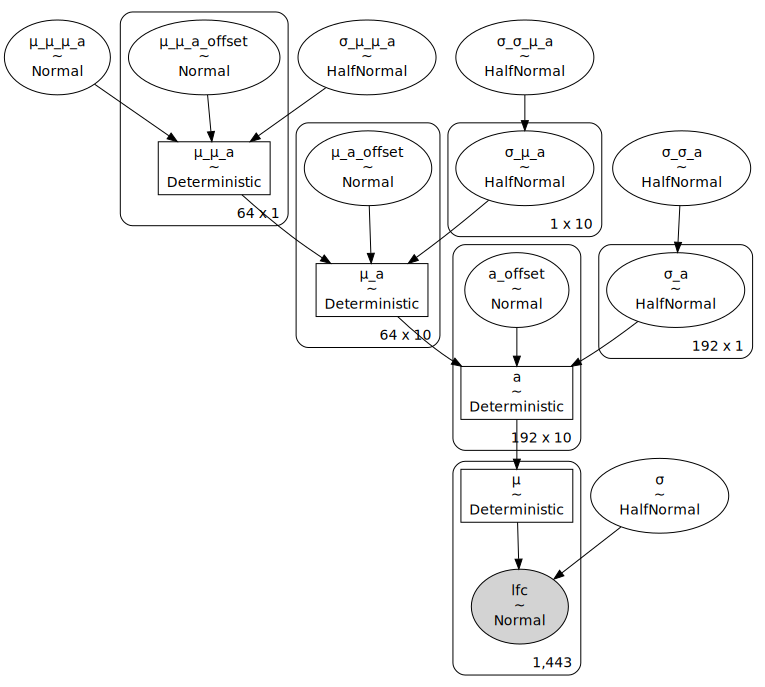

In [9]:
pm.model_to_graphviz(speclet_model.model)

## Fit diagnostics

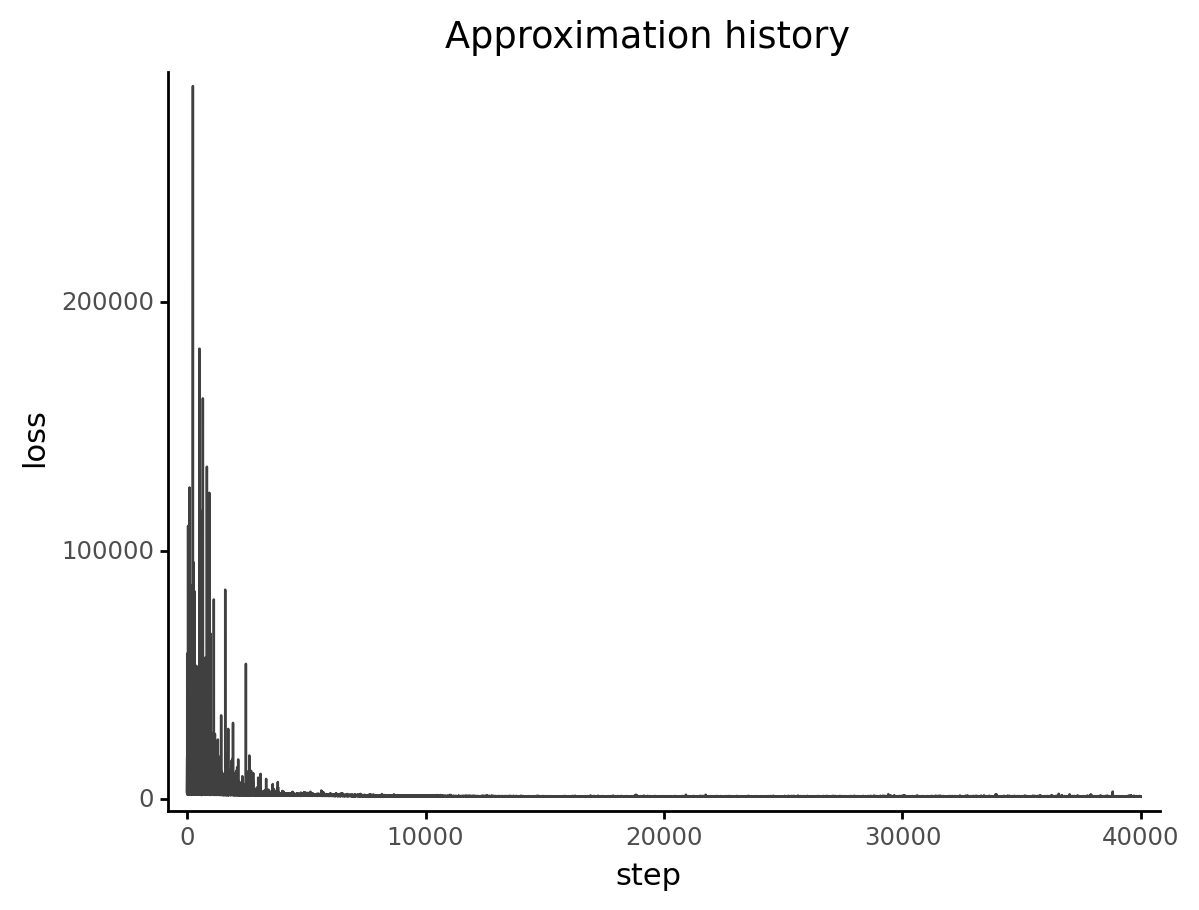

In [10]:
if FIT_METHOD == "ADVI":
    pmanal.plot_vi_hist(advi_approx).draw()
    plt.show()
else:
    print("R-HAT")
    print(az.rhat(model_az))
    print("=" * 60)
    print("BFMI")
    print(az.bfmi(model_az))

## Model parameters

In [11]:
def check_shape(trace: np.ndarray) -> np.ndarray:
    if len(trace.shape) == 1:
        return trace[:, None]
    return trace


def add_hdi(p: gg.ggplot, values: np.ndarray, color: str) -> gg.ggplot:
    m = np.mean(values)
    hdi = az.hdi(values, hdi_prob=0.89).flatten()
    p = (
        p
        + gg.geom_vline(xintercept=m, color=color)
        + gg.geom_vline(xintercept=hdi, color=color, linetype="--")
    )
    return p


def variable_distribution_plot(var, trace: np.ndarray, max_plot=20000) -> gg.ggplot:
    trace = check_shape(trace)

    # Sample 25% of the trace.
    d = pd.DataFrame(trace).melt().assign(variable=lambda d: d.variable.astype("str"))
    d_summaries = d.groupby(["variable"])["value"].mean().reset_index(drop=False)

    if d.shape[0] > max_plot:
        d = d.sample(n=max_plot)
    else:
        d = d.sample(frac=0.2)

    p = (
        gg.ggplot(d, gg.aes(x="value"))
        + gg.geom_density(alpha=0.1)
        + gg.geom_vline(xintercept=0, color="black", size=0.7, alpha=0.7, linetype="--")
        + gg.scale_x_continuous(expand=(0, 0))
        + gg.scale_y_continuous(expand=(0, 0, 0.02, 0))
        + gg.theme(legend_position="none", figure_size=(6.5, 3))
        + gg.labs(x="posterior", y="density", title=f"Posterior distirbution of {var}")
    )

    c = SeabornColor.blue

    if len(d_summaries) > 1:
        p = p + gg.geom_rug(
            data=d_summaries, sides="b", alpha=0.5, color=c, length=0.08
        )
    else:
        p = add_hdi(p, trace.flatten(), color=c)

    return p

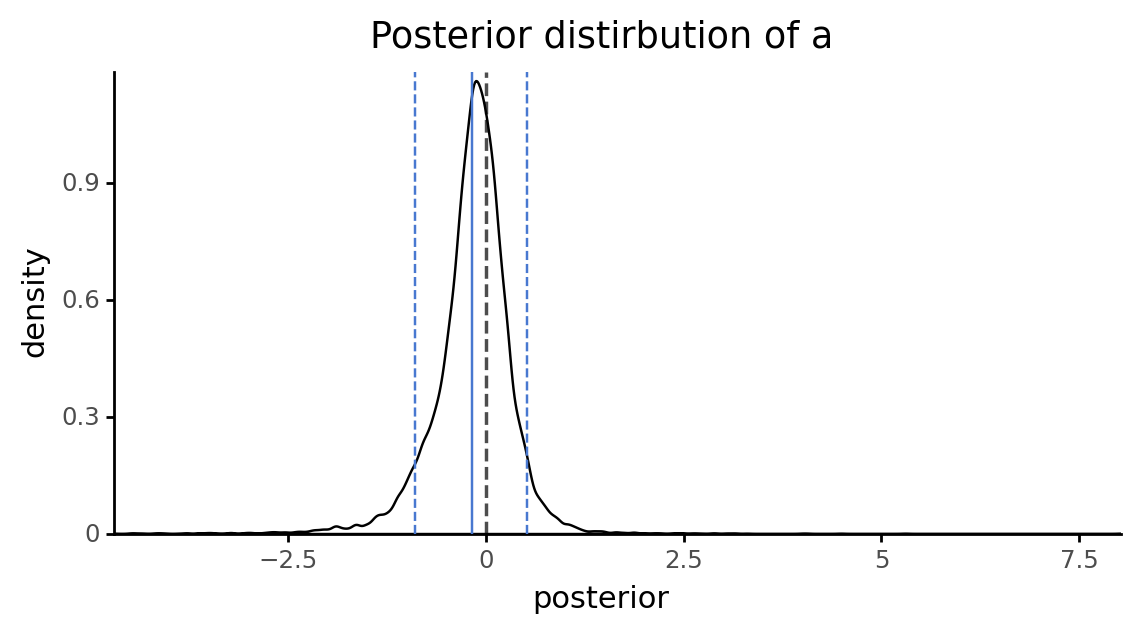

<ggplot: (2945686441319)>


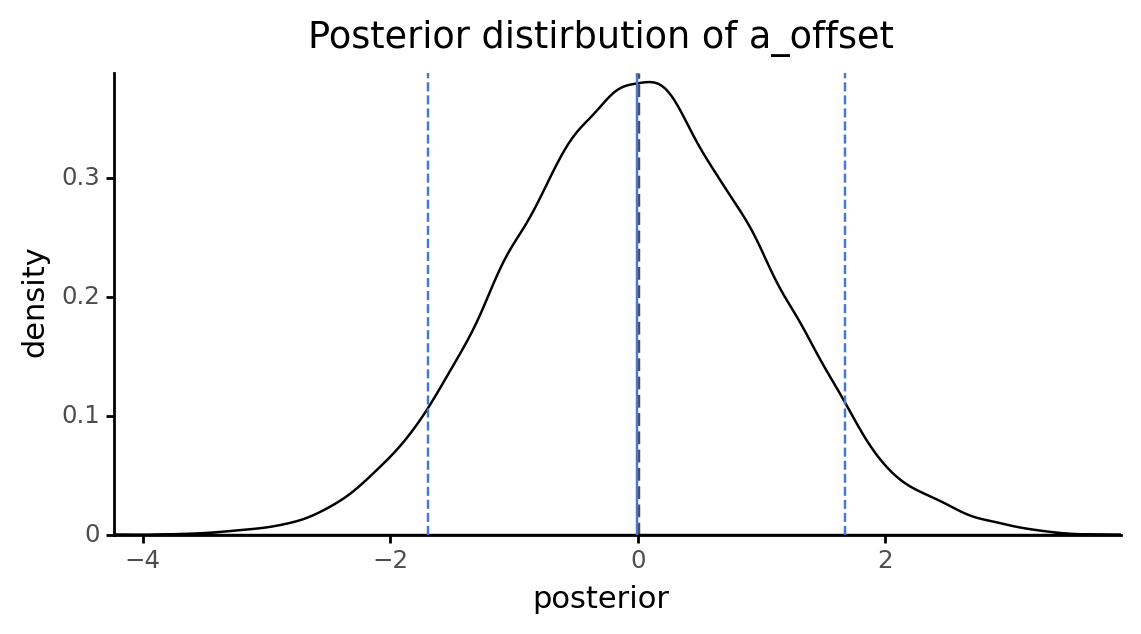

<ggplot: (2945686443406)>


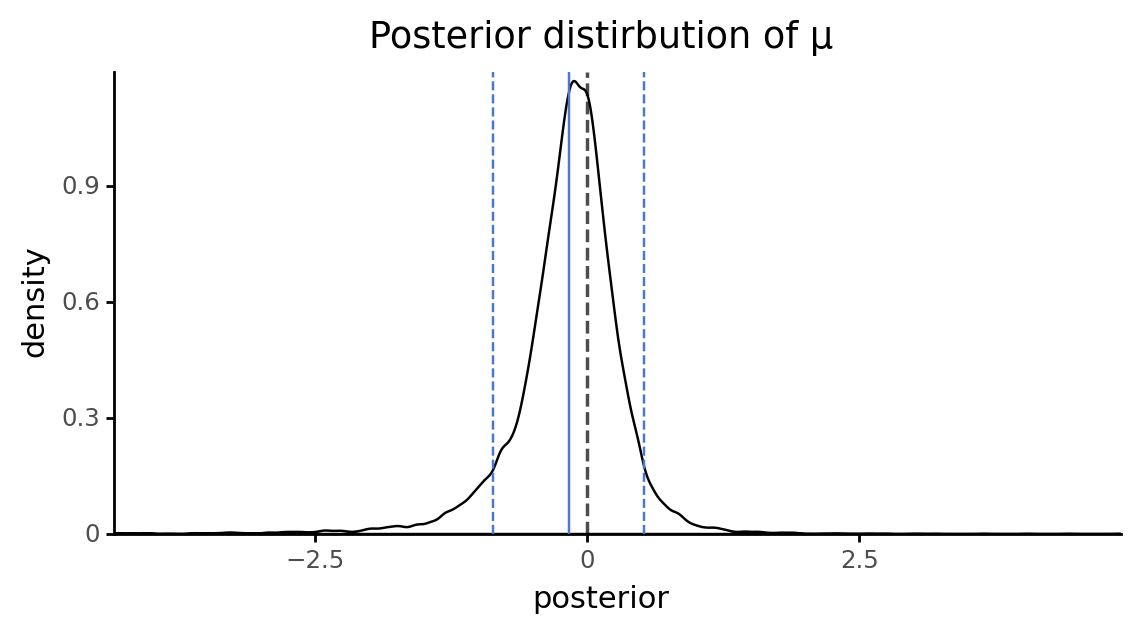

<ggplot: (2945686440888)>


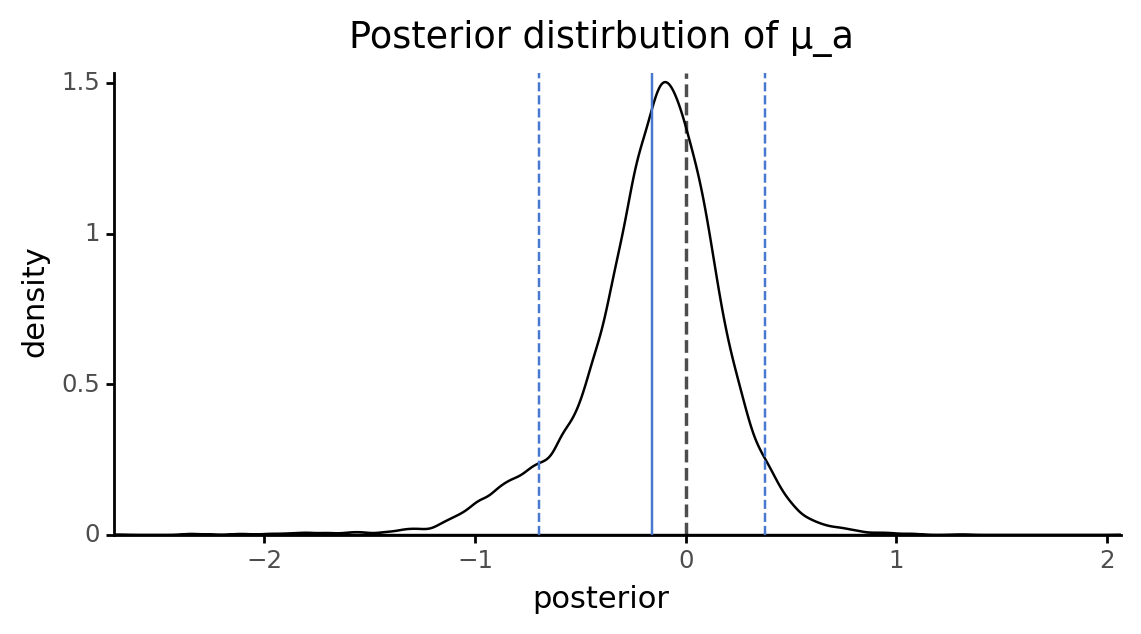

<ggplot: (2945686440849)>


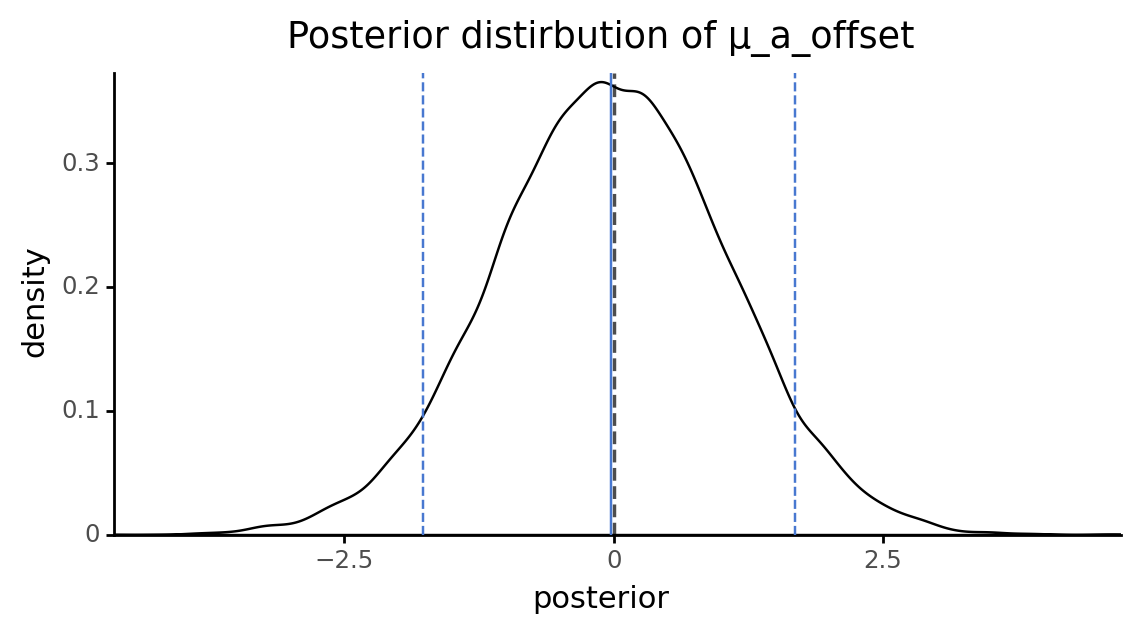

<ggplot: (2945689966391)>


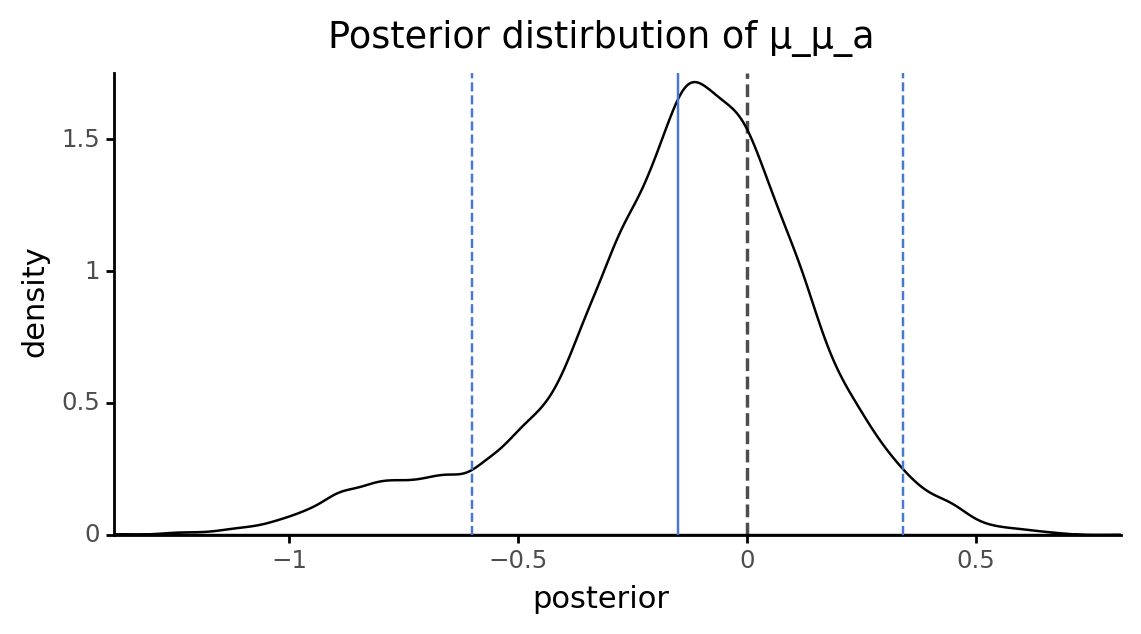

<ggplot: (2945690869264)>


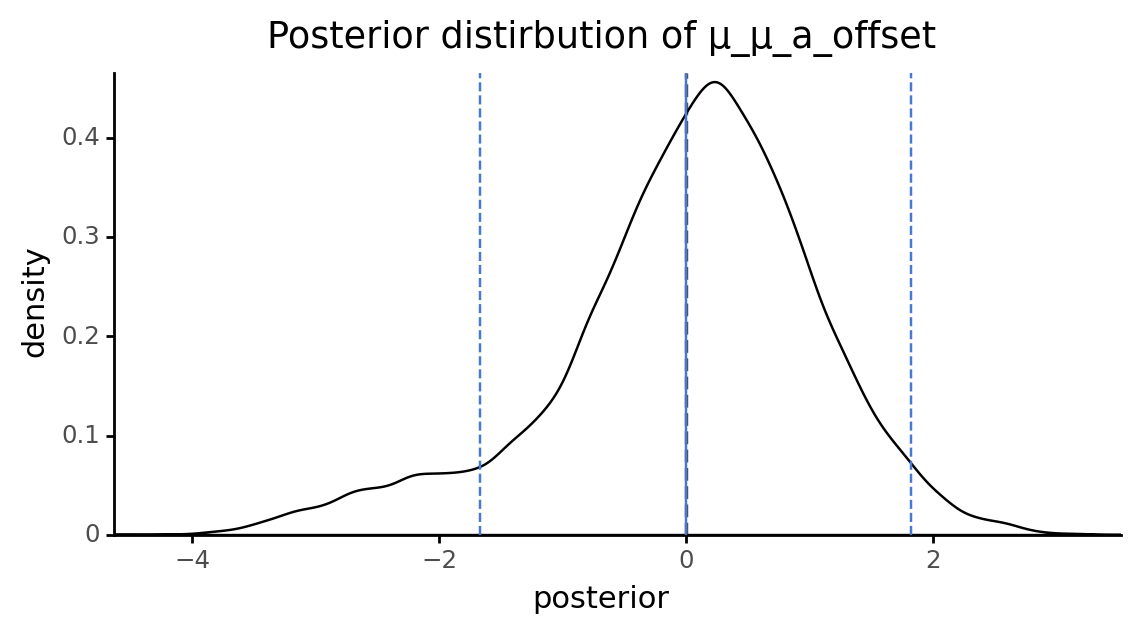

<ggplot: (2945675476923)>


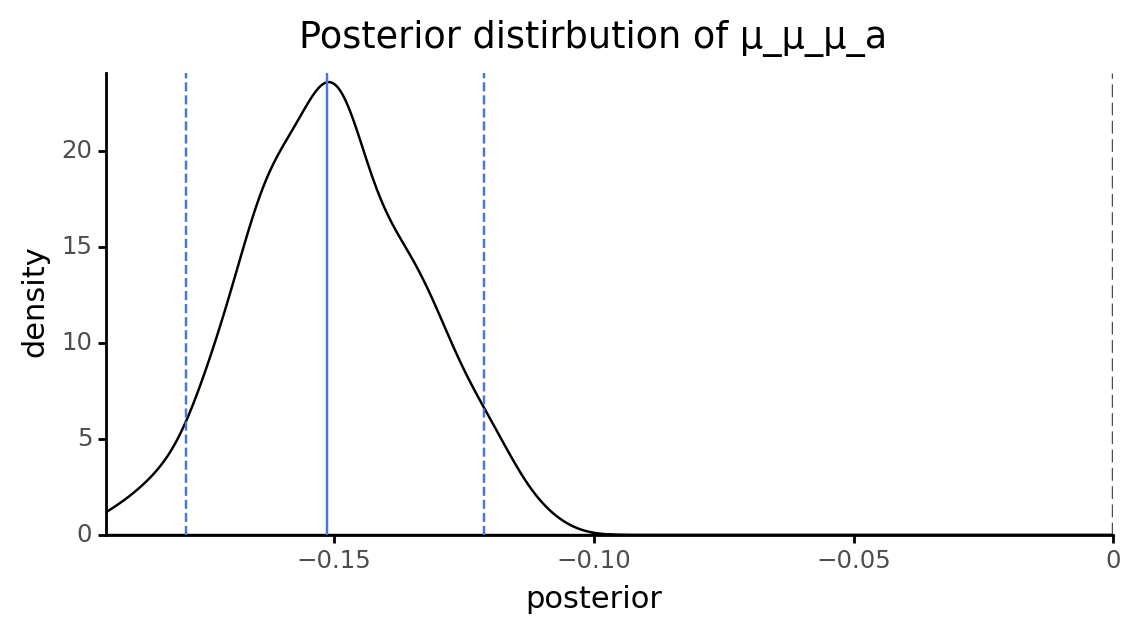

<ggplot: (2945687265021)>


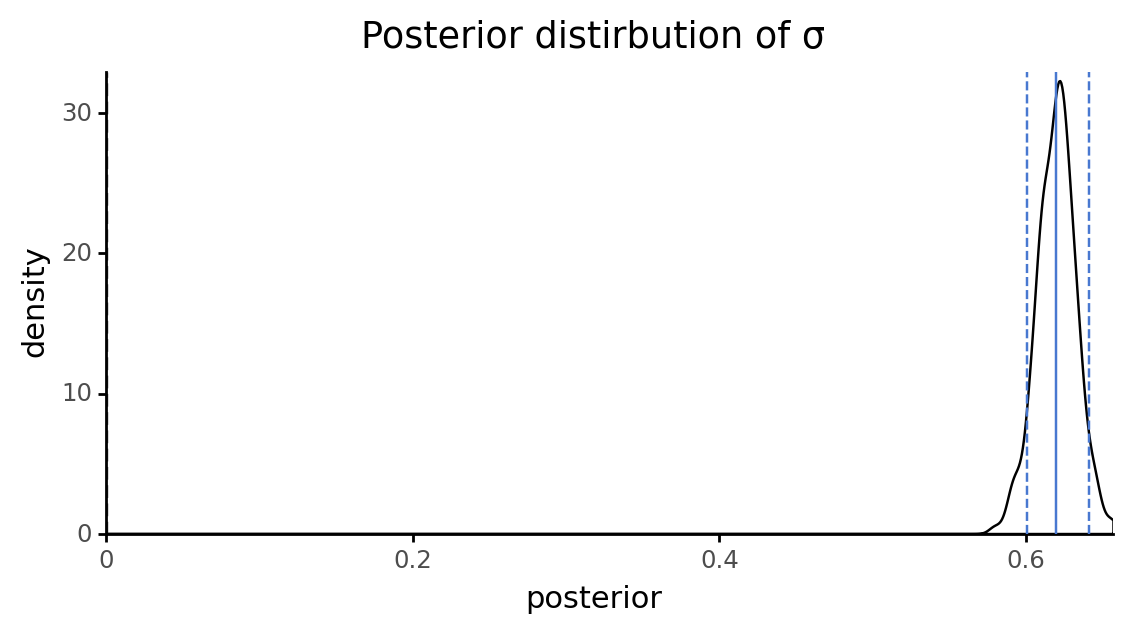

<ggplot: (2945686443795)>


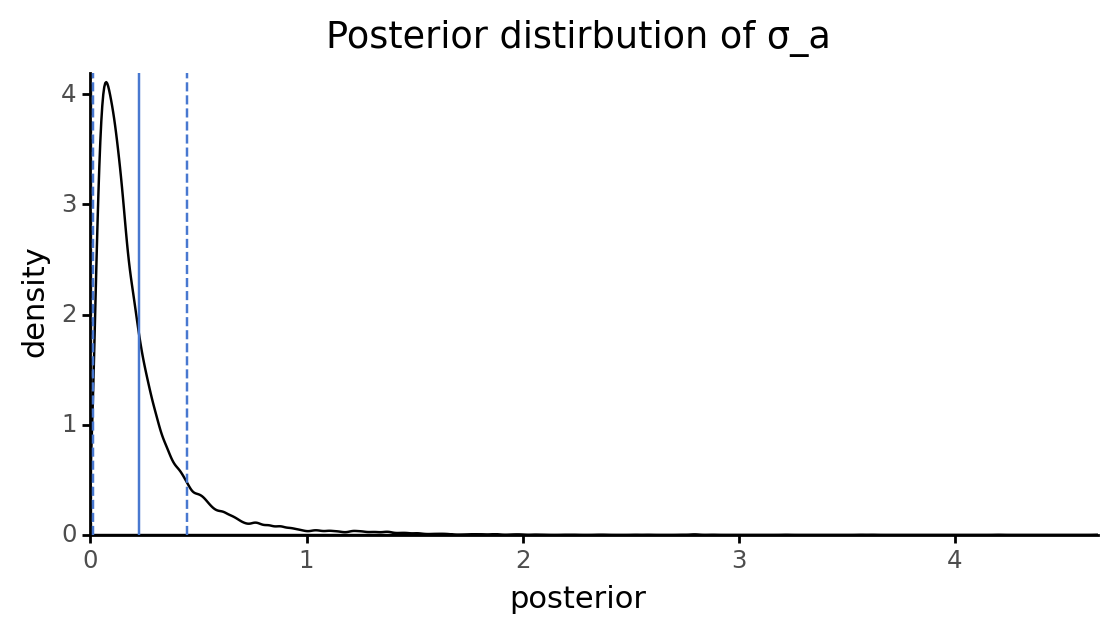

<ggplot: (2945693415235)>


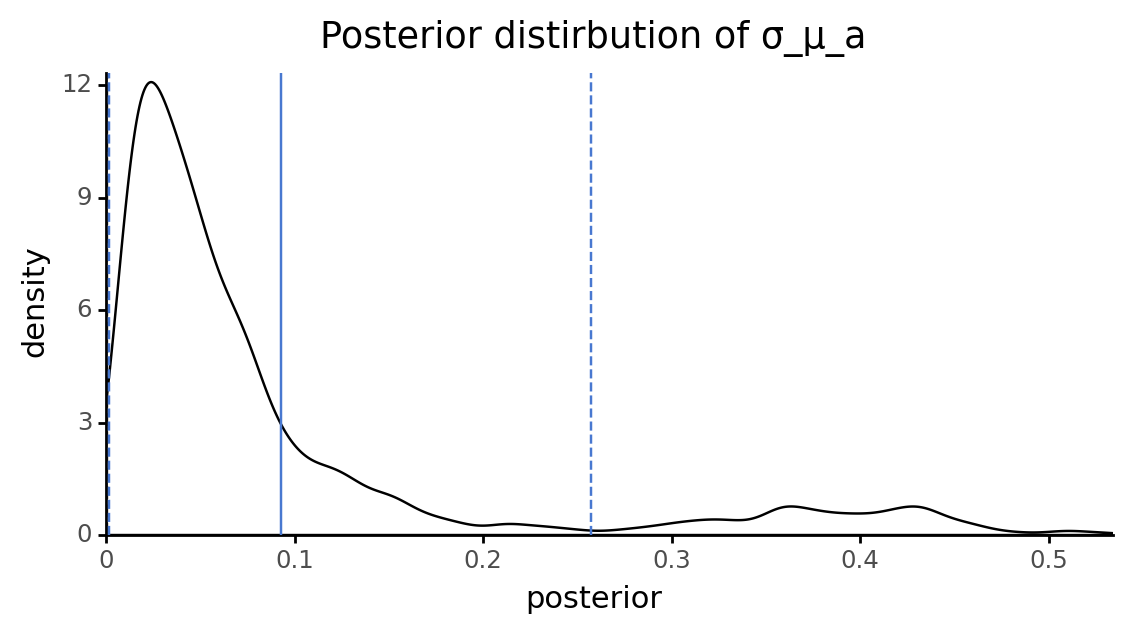

<ggplot: (2945691859294)>


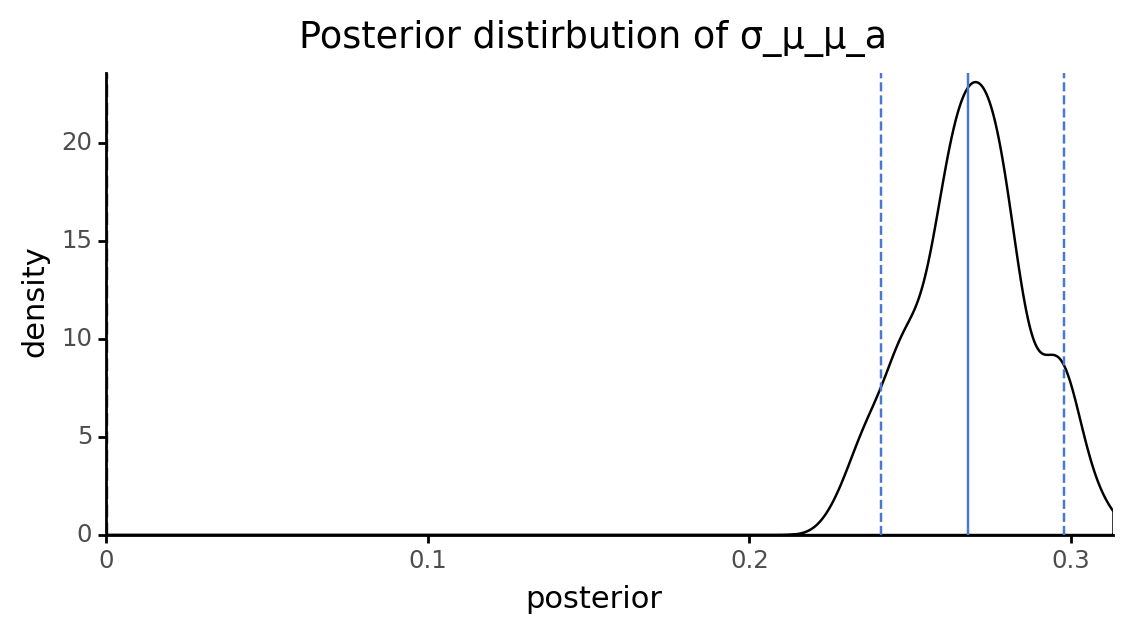

<ggplot: (2945693426550)>


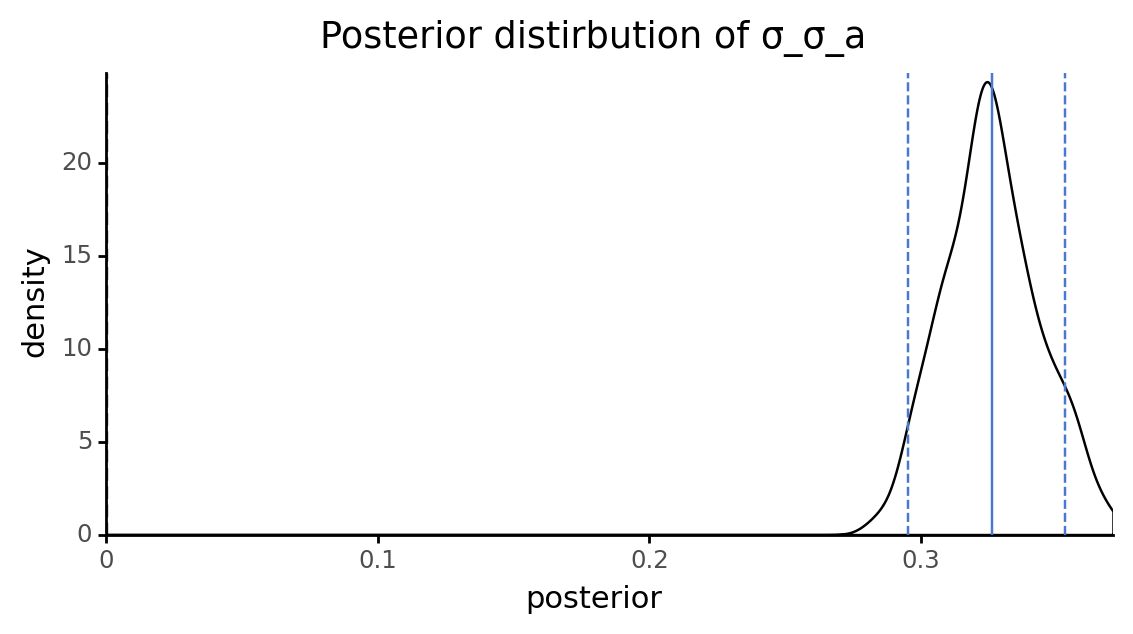

<ggplot: (2945691879385)>


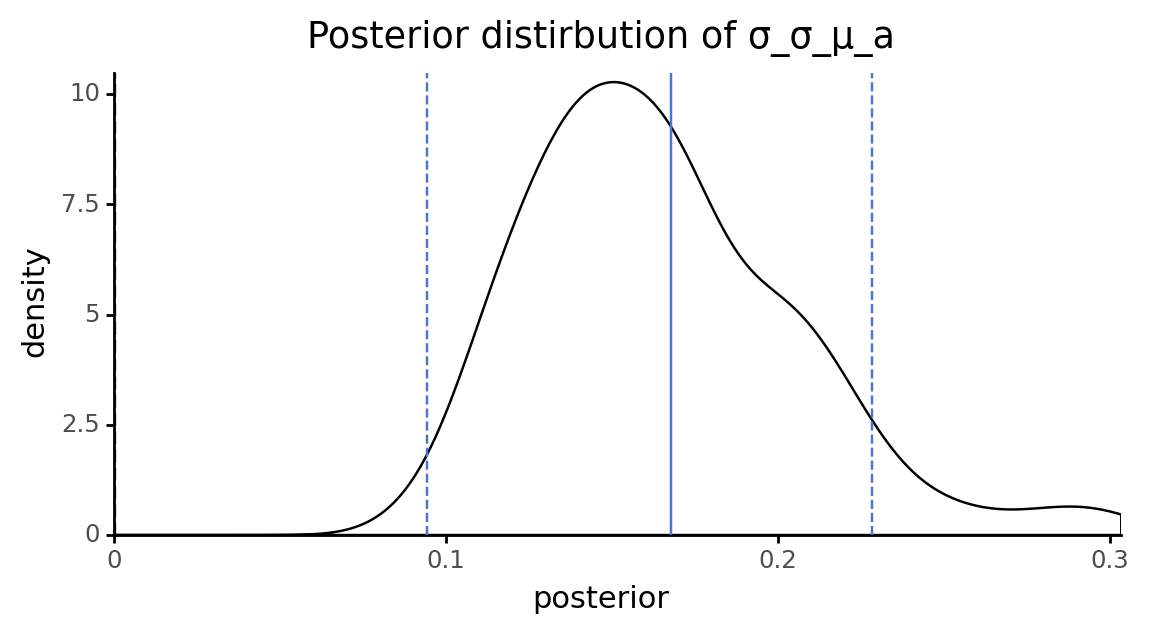

<ggplot: (2945688545723)>


In [12]:
ignore_vars = "μ"
vars_to_inspect = model_az.posterior.keys()
vars_to_inspect = [v for v in vars_to_inspect if not "log" in v]
vars_to_inspect.sort()

for var in vars_to_inspect:
    trace = model_az.posterior[var]
    if trace.shape[1] == data.shape[0]:
        # Do not plot the final deterministic mean (usually "μ").
        continue
    try:
        print(variable_distribution_plot(var, model_az.posterior[var].values.flatten()))
    except Exception as err:
        print(f"Skipping variable '{var}'.")
        print(err)

In [13]:
if isinstance(speclet_model, SpecletTestModel):
    raise KeyboardInterrupt()

## Model predictions

In [14]:
predictions = model_az.posterior_predictive
pred_summary = pmanal.summarize_posterior_predictions(
    predictions["lfc"].values,
    merge_with=data,
    calc_error=True,
    observed_y="lfc",
)
pred_summary.head()

/n/data1/hms/dbmi/park/Cook/speclet/.snakemake/conda/daab5ac5/lib/python3.9/site-packages/arviz/stats/stats.py:456: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions


,pred_mean,pred_hdi_low,pred_hdi_high,sgrna,replicate_id,lfc,p_dna_batch,genome_alignment,hugo_symbol,screen,...,any_deleterious,any_tcga_hotspot,any_cosmic_hotspot,is_mutated,copy_number,lineage,primary_or_metastasis,is_male,age,error
0,-0.258417,-1.351624,0.864264,CTTGTTAGATAATGGAACT,LS513_c903R1,-1.100620,ERS717283.plasmid,chr2_157544604_-,ACVR1C,sanger,...,NaN,NaN,NaN,False,0.964254,colorectal,primary,True,63.0,-0.842204
1,-0.160888,-1.175731,1.039939,CTTGTTAGATAATGGAACT,CL11_c903R1,-0.572939,ERS717283.plasmid,chr2_157544604_-,ACVR1C,sanger,...,NaN,NaN,NaN,False,1.004888,colorectal,primary,True,NaN,-0.412051
2,-0.089556,-1.218988,0.995760,CTTGTTAGATAATGGAACT,HT29_c904R1,0.054573,ERS717283.plasmid,chr2_157544604_-,ACVR1C,sanger,...,NaN,NaN,NaN,False,1.014253,colorectal,primary,False,44.0,0.144129
3,-0.040015,-1.226766,0.903098,CTTGTTAGATAATGGAACT,SNUC1_c903R4,0.700923,ERS717283.plasmid,chr2_157544604_-,ACVR1C,sanger,...,NaN,NaN,NaN,False,0.946028,colorectal,metastasis,True,71.0,0.740938
4,-0.238928,-1.356316,0.764039,CTTGTTAGATAATGGAACT,KM12_c908R1_100,-1.123352,CRISPR_C6596666.sample,chr2_157544604_-,ACVR1C,sanger,...,NaN,NaN,NaN,False,1.048861,colorectal,primary,NaN,NaN,-0.884424


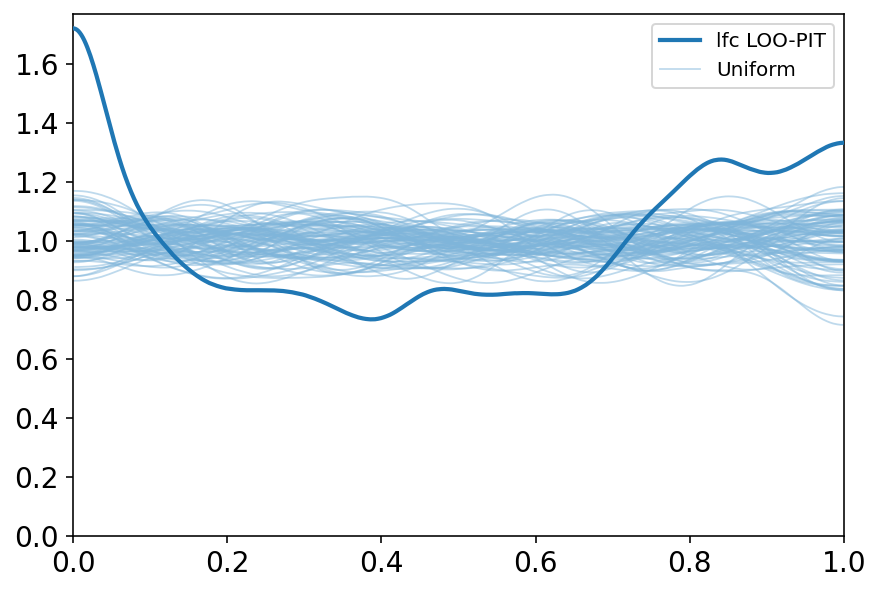

In [15]:
try:
    az.plot_loo_pit(model_az, y="lfc")
except Exception as e:
    print(e)

In [16]:
model_loo = az.loo(model_az, pointwise=True)
print(model_loo)

Computed from 1000 by 1443 log-likelihood matrix

         Estimate       SE
elpd_loo -3263.52    62.39
p_loo     2085.04        -

There has been a warning during the calculation. Please check the results.
------

Pareto k diagnostic values:
                         Count   Pct.
(-Inf, 0.5]   (good)        0    0.0%
 (0.5, 0.7]   (ok)          7    0.5%
   (0.7, 1]   (bad)       101    7.0%
   (1, Inf)   (very bad) 1335   92.5%



/n/data1/hms/dbmi/park/Cook/speclet/.snakemake/conda/daab5ac5/lib/python3.9/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).


<AxesSubplot:ylabel='Density'>

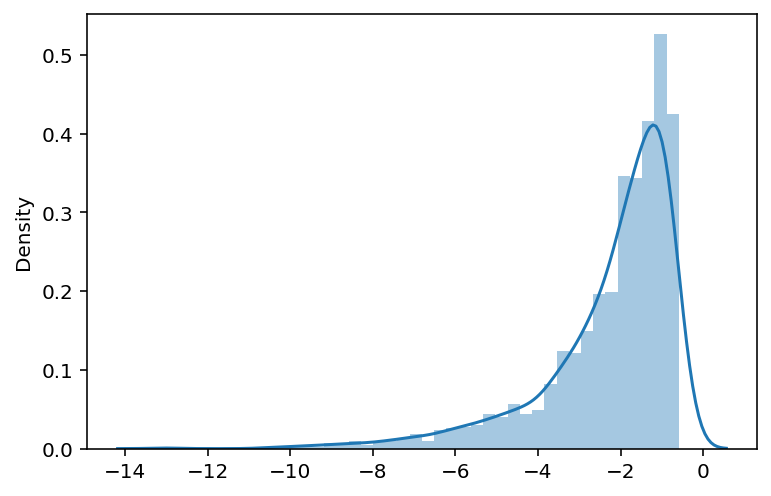

In [17]:
sns.distplot(model_loo.loo_i.values);

In [18]:
pred_summary["loo"] = model_loo.loo_i.values

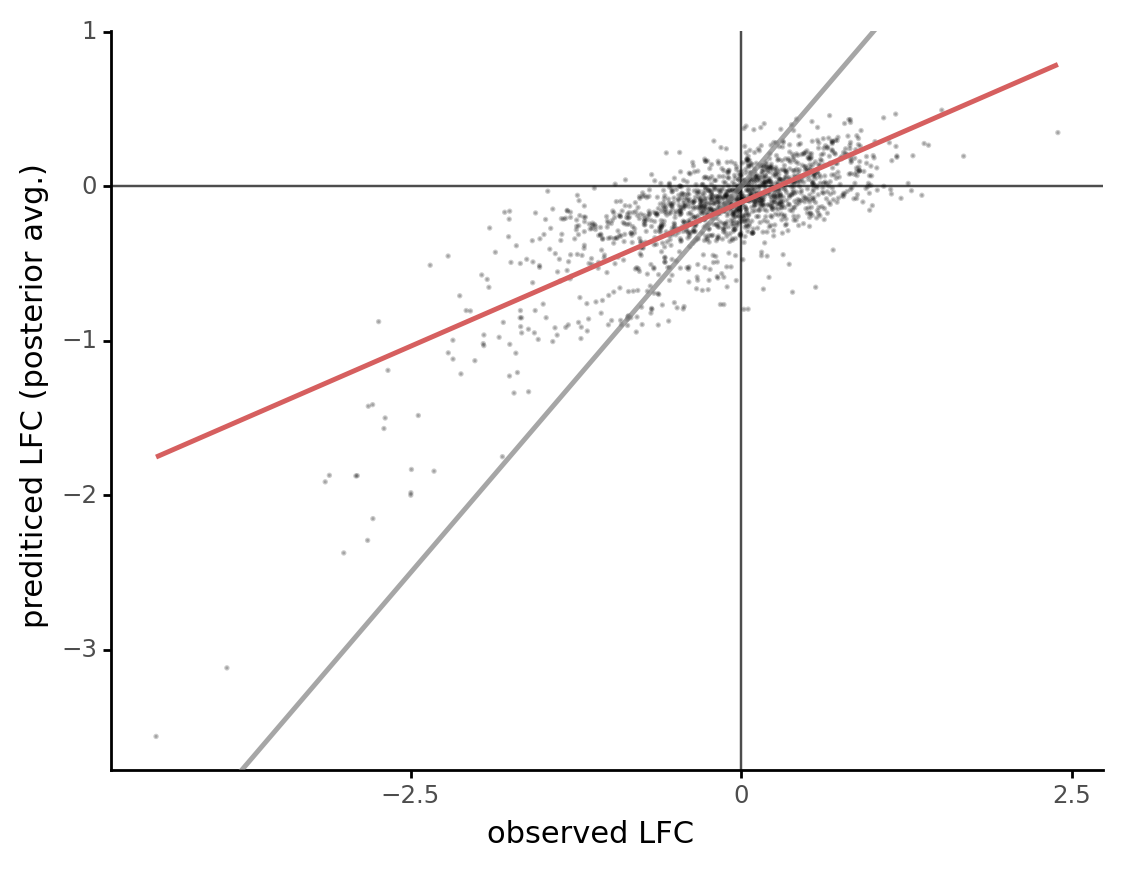

<ggplot: (2945688030371)>

In [19]:
(
    gg.ggplot(pred_summary, gg.aes(x="lfc", y="pred_mean"))
    + gg.geom_hline(yintercept=0, size=0.5, alpha=0.7)
    + gg.geom_vline(xintercept=0, size=0.5, alpha=0.7)
    + gg.geom_point(size=0.1, alpha=0.2)
    + gg.geom_abline(slope=1, intercept=0, size=1, alpha=0.7, color="grey")
    + gg.geom_smooth(method="glm", color=SeabornColor.red, size=1, alpha=0.7, se=False)
    + gg.labs(x="observed LFC", y="prediticed LFC (posterior avg.)")
)

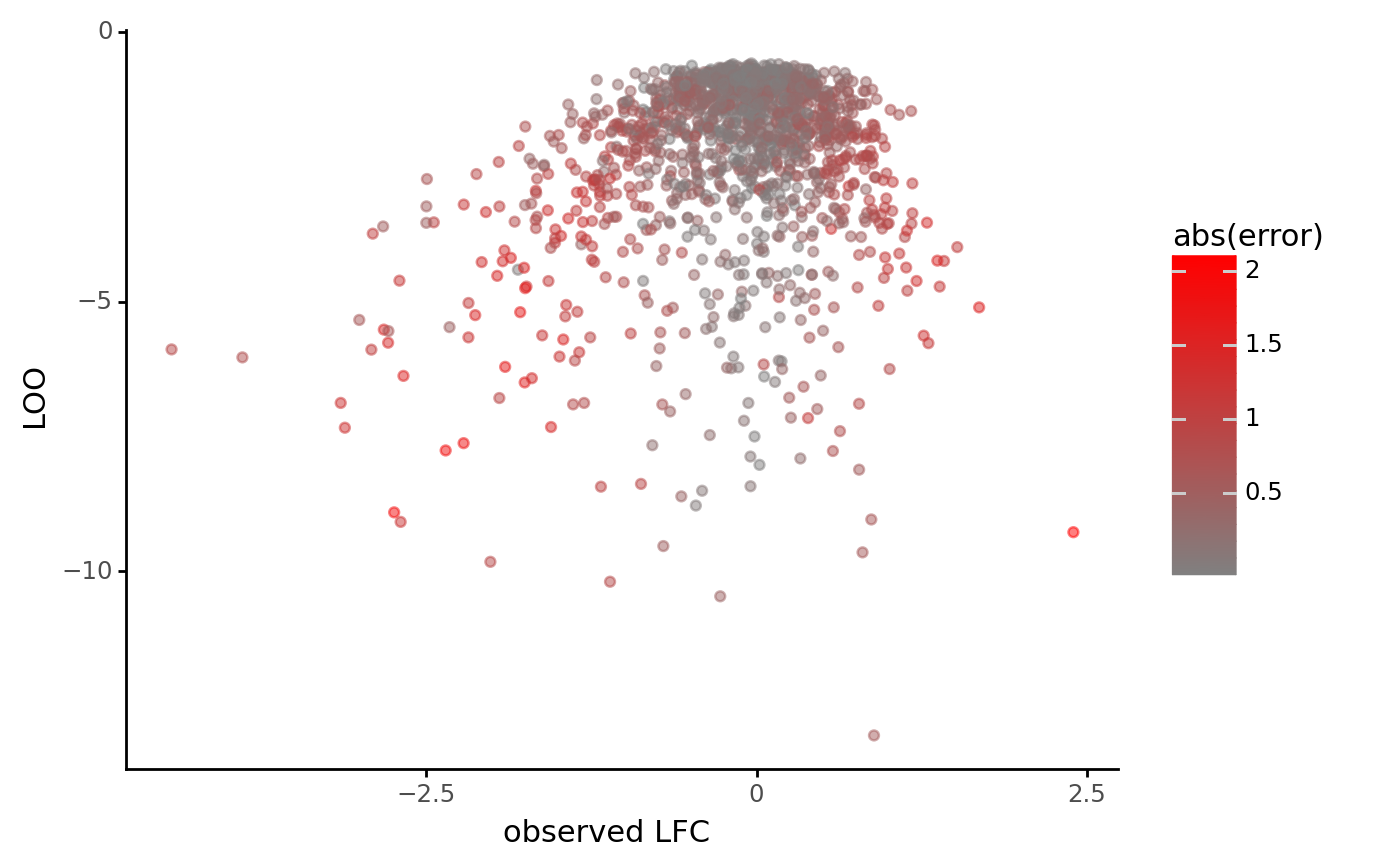

<ggplot: (2945688086266)>

In [20]:
(
    gg.ggplot(pred_summary, gg.aes(x="lfc", y="loo"))
    + gg.geom_point(gg.aes(color="np.abs(error)"), alpha=0.5)
    + gg.scale_color_gradient(low="grey", high="red")
    + gg.theme()
    + gg.labs(x="observed LFC", y="LOO", color="abs(error)")
)

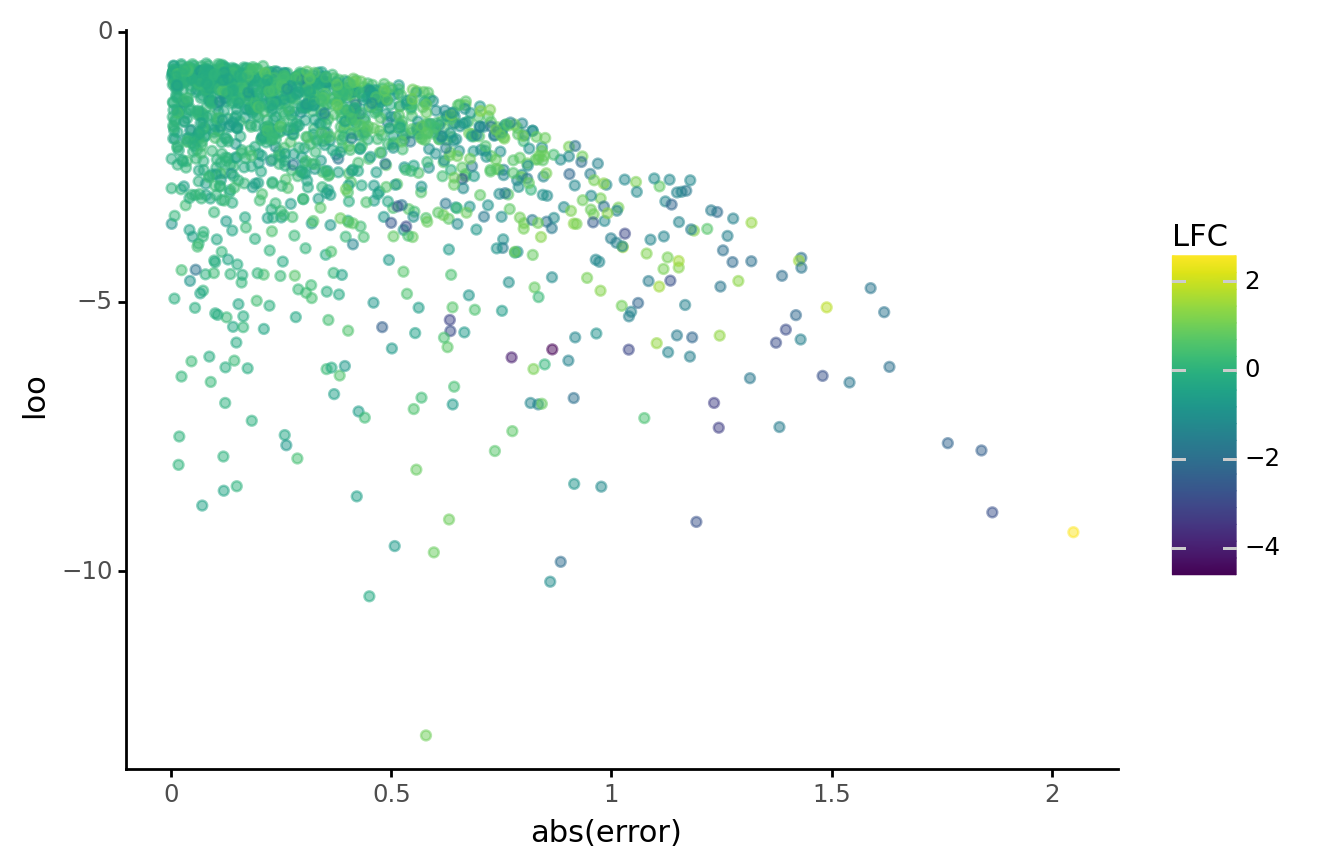

<ggplot: (2945686442325)>

In [21]:
(
    gg.ggplot(pred_summary, gg.aes(x="np.abs(error)", y="loo"))
    + gg.geom_point(gg.aes(color="lfc"), alpha=0.5)
    + gg.labs(x="abs(error)", y="loo", color="LFC")
)

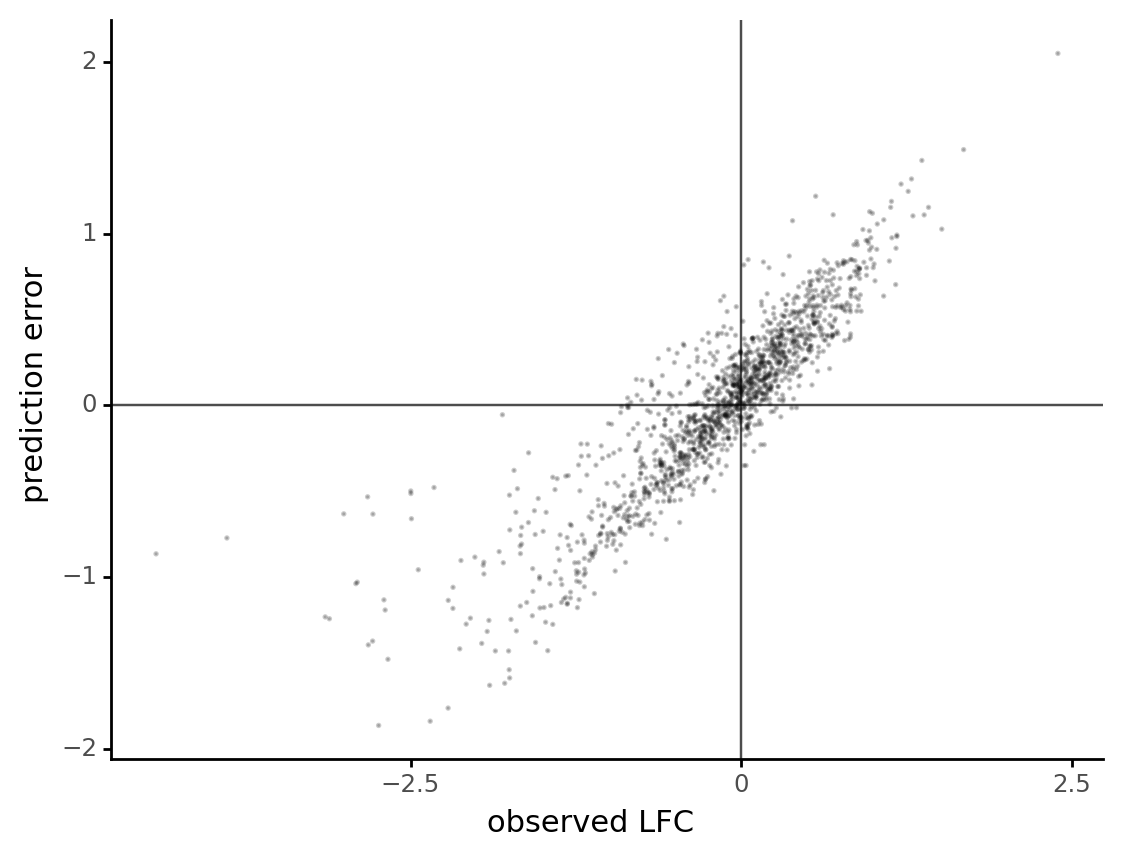

<ggplot: (2945689968993)>

In [22]:
(
    gg.ggplot(pred_summary, gg.aes(x="lfc", y="error"))
    + gg.geom_hline(yintercept=0, size=0.5, alpha=0.7)
    + gg.geom_vline(xintercept=0, size=0.5, alpha=0.7)
    + gg.geom_point(size=0.1, alpha=0.2)
    + gg.labs(x="observed LFC", y="prediction error")
)

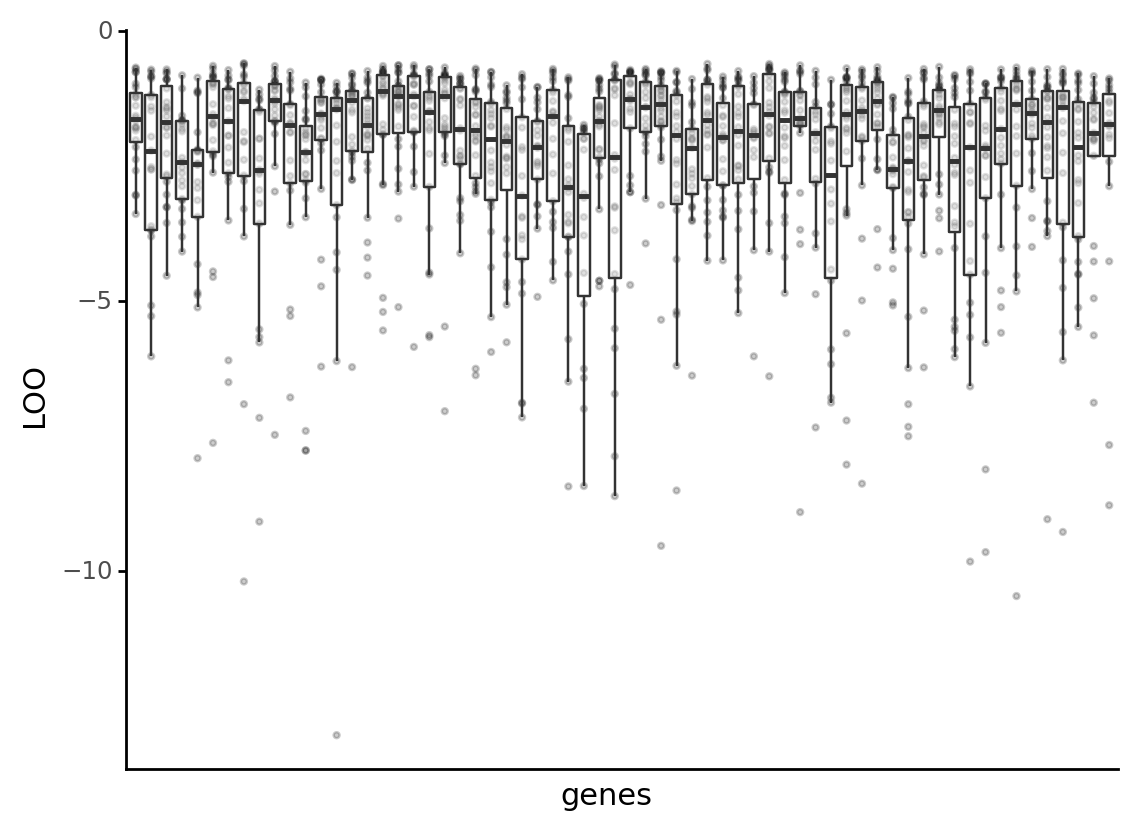

<ggplot: (2945675756222)>

In [23]:
(
    gg.ggplot(pred_summary, gg.aes(x="hugo_symbol", y="loo"))
    + gg.geom_point(alpha=0.2, size=0.7)
    + gg.geom_boxplot(outlier_alpha=0, alpha=0.4)
    + gg.theme(axis_text_x=gg.element_blank(), axis_ticks_major_x=gg.element_blank())
    + gg.labs(x="genes", y="LOO")
)

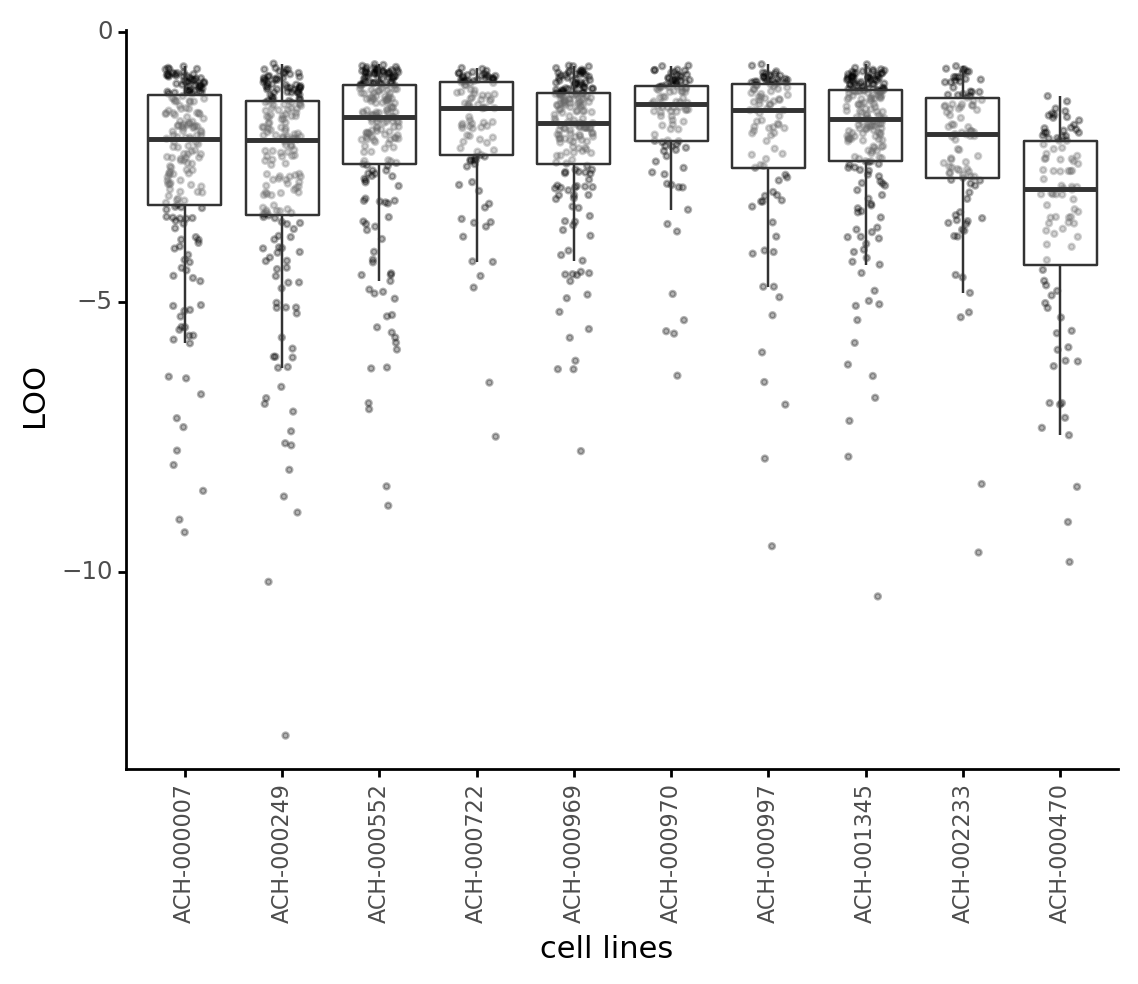

<ggplot: (2945684887019)>

In [24]:
(
    gg.ggplot(pred_summary, gg.aes(x="depmap_id", y="loo"))
    + gg.geom_jitter(width=0.2, alpha=0.3, size=0.7)
    + gg.geom_boxplot(outlier_alpha=0, alpha=0.4)
    + gg.theme(
        axis_text_x=gg.element_text(angle=90, size=8),
    )
    + gg.labs(x="cell lines", y="LOO")
)

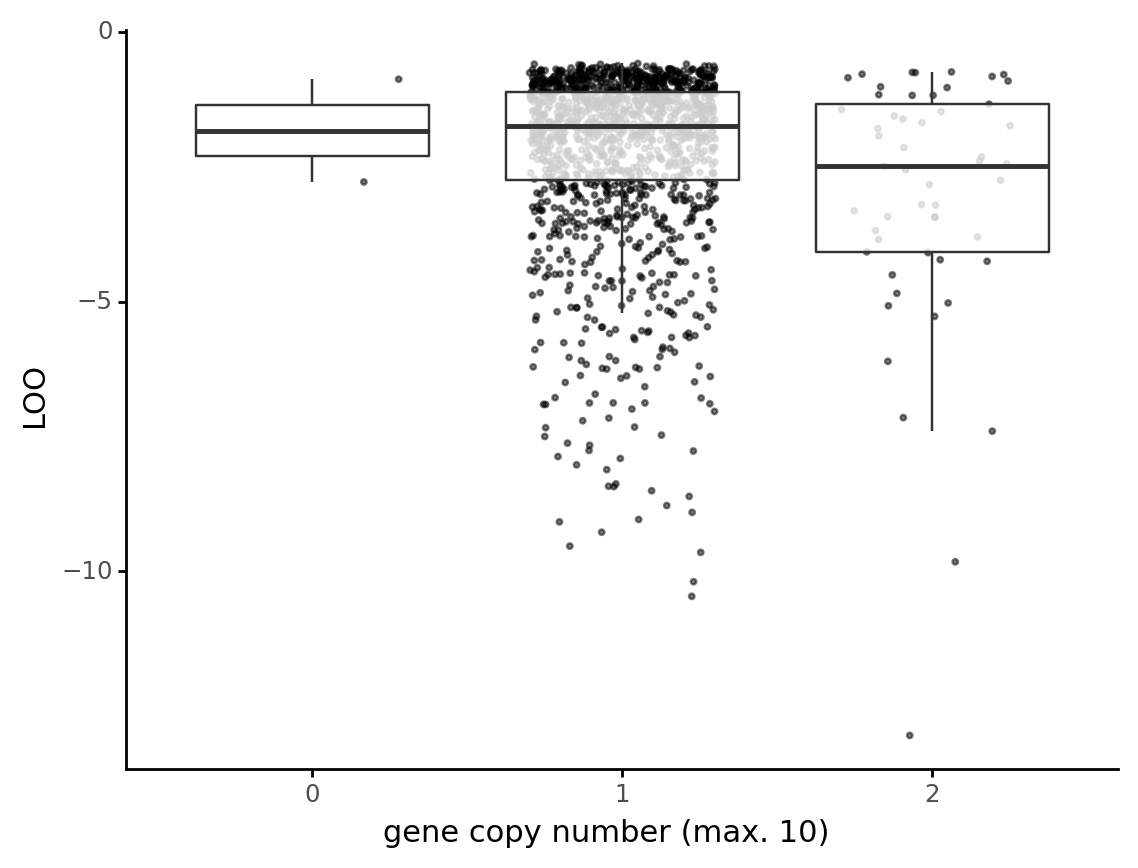

<ggplot: (2945684886860)>

In [25]:
# Remove samples without gene CN data.
ppc_df_no_missing = pred_summary.copy()[~pred_summary["copy_number"].isna()]
ppc_df_no_missing["binned_copy_number"] = [
    np.min([round(x), 10]) for x in ppc_df_no_missing["copy_number"]
]

(
    gg.ggplot(ppc_df_no_missing, gg.aes(x="factor(binned_copy_number)", y="loo"))
    + gg.geom_jitter(size=0.6, alpha=0.5, width=0.3)
    + gg.geom_boxplot(outlier_alpha=0, alpha=0.8)
    + gg.labs(x="gene copy number (max. 10)", y="LOO")
)

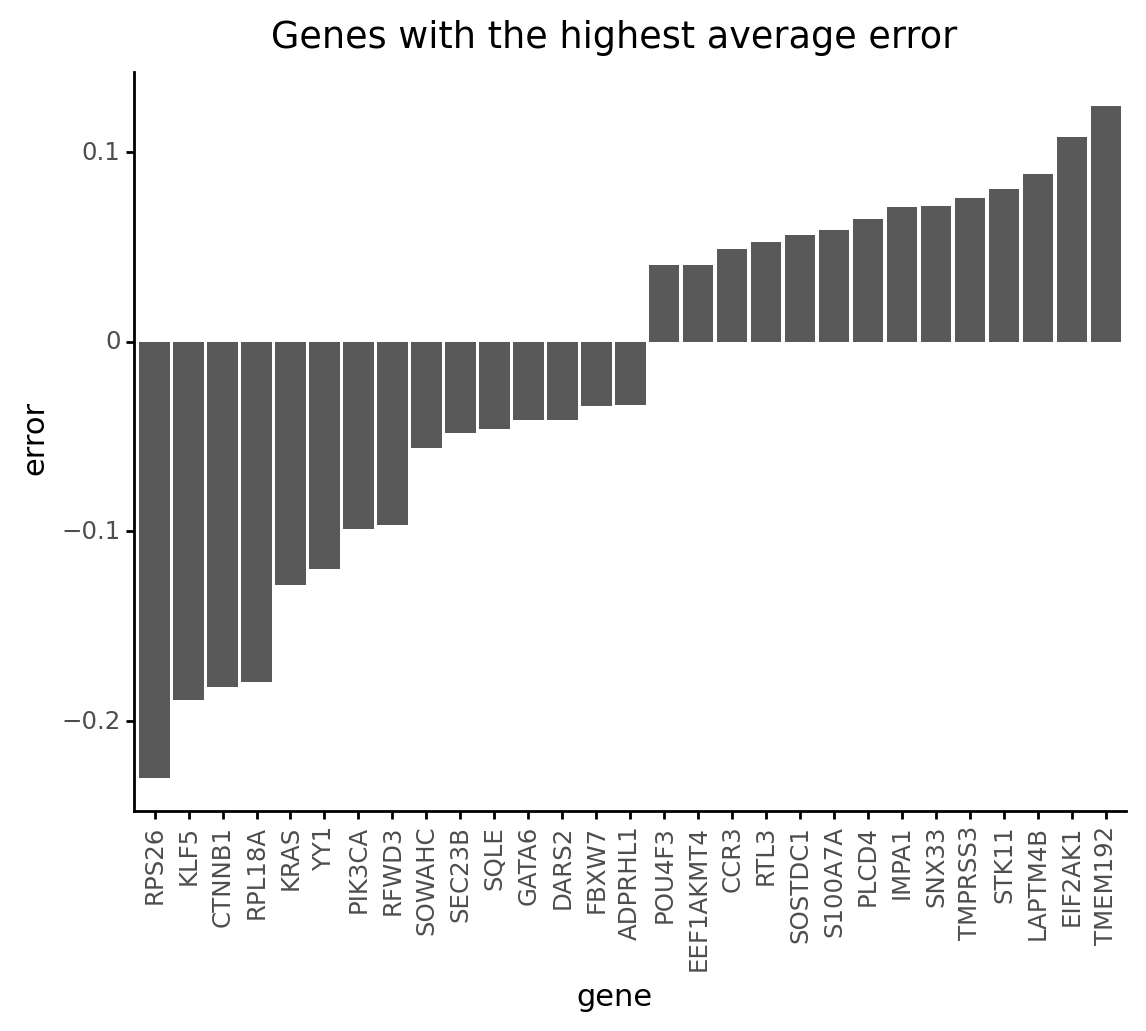

<ggplot: (2945684907966)>

In [26]:
gene_error = (
    pred_summary.groupby(["hugo_symbol"])["error"]
    .agg([np.mean, np.std])
    .reset_index(drop=False)
    .sort_values(["mean"])
    .reset_index(drop=True)
    .assign(
        hugo_symbol=lambda d: pd.Categorical(
            d.hugo_symbol.astype(str),
            categories=d.hugo_symbol.astype(str),
            ordered=True,
        )
    )
)

n_genes = 15

(
    gg.ggplot(
        gene_error.iloc[list(range(n_genes)) + list(range(-n_genes, -1))],
        gg.aes(x="hugo_symbol", y="mean"),
    )
    + gg.geom_col()
    + gg.theme(axis_text_x=gg.element_text(angle=90))
    + gg.labs(x="gene", y="error", title="Genes with the highest average error")
)

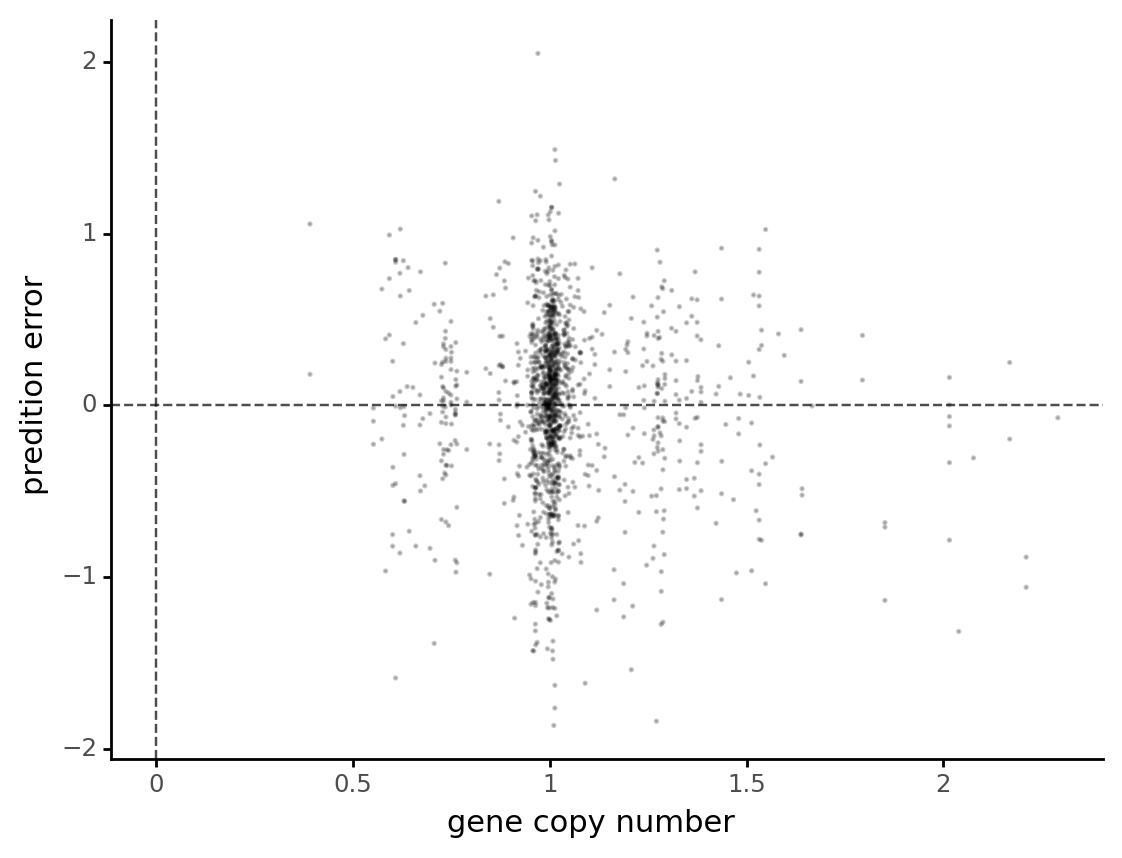

<ggplot: (2945688162392)>

In [27]:
(
    gg.ggplot(pred_summary, gg.aes(x="copy_number", y="error"))
    + gg.geom_hline(yintercept=0, size=0.5, alpha=0.7, linetype="--")
    + gg.geom_vline(xintercept=0, size=0.5, alpha=0.7, linetype="--")
    + gg.geom_point(size=0.1, alpha=0.2)
    + gg.labs(x="gene copy number", y="predition error")
)

---

In [28]:
notebook_toc = time()
print(f"execution time: {(notebook_toc - notebook_tic) / 60:.2f} minutes")

execution time: 3.67 minutes


In [29]:
%load_ext watermark
%watermark -d -u -v -iv -b -h -m

Last updated: 2021-06-16

Python implementation: CPython
Python version       : 3.9.2
IPython version      : 7.21.0

Compiler    : GCC 9.3.0
OS          : Linux
Release     : 3.10.0-1062.el7.x86_64
Machine     : x86_64
Processor   : x86_64
CPU cores   : 32
Architecture: 64bit

Hostname: compute-h-17-51.o2.rc.hms.harvard.edu

Git branch: sp7

numpy     : 1.20.1
plotnine  : 0.7.1
pymc3     : 3.11.1
arviz     : 0.11.2
matplotlib: 3.3.4
pandas    : 1.2.3
seaborn   : 0.11.1

